# MSikos Achievement 2 Exercise 2.3: Fundamentals of Visualization Libraries Part 1

## 1. Install libraries, set system path, and import dataset from prior exercise

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import os
from matplotlib import pyplot as plt
from datetime import datetime as dt

In [2]:
# Set system path
path = r'C:\Users\Stony\OneDrive\CareerFoundry\Data Specialization Course\envs\Citi-Bike'

In [3]:
# Import dataset from prior exercise
df_merged = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged_data.csv'), index_col = 0)

C:\Users\Stony\AppData\Local\Temp\ipykernel_22892\945444868.py:2: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_merged = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged_data.csv'), index_col = 0)


In [4]:
# Validate dataframe created successfully
df_merged.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

## 2. Clean and verify the dataframe

In [5]:
# Drop the _merge column that was created when we merged the datasets previously
df_merged.drop(columns = {'_merge'}, inplace = True)

In [6]:
# Verify column dropped successfully
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29838806 entries, 0 to 29838805
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  date                object 
 14  avgTemp             float64
dtypes: float64(5), object(10)
memory usage: 3.6+ GB


In [7]:
# Verify structure of dataframe
df_merged.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,-6.0
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,1.6
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,-2.3
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,1.4
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.1,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,-5.9


In [8]:
df_merged.shape

(29838806, 15)

In [9]:
df_merged.count

<bound method DataFrame.count of                    ride_id  rideable_type               started_at  \
0         BFD29218AB271154  electric_bike  2022-01-21 13:13:43.392   
1         7C953F2FD7BE1302   classic_bike  2022-01-10 11:30:54.162   
2         95893ABD40CED4B8  electric_bike  2022-01-26 10:52:43.096   
3         F853B50772137378   classic_bike  2022-01-03 08:35:48.247   
4         7590ADF834797B4B   classic_bike  2022-01-22 14:14:23.043   
...                    ...            ...                      ...   
29838801  1F223EDAFF420AE3  electric_bike  2022-12-01 20:26:45.847   
29838802  CFA5C560ACB73B8E   classic_bike  2022-12-26 13:46:34.237   
29838803  11C8C5E0DB947B07   classic_bike  2022-12-01 05:56:14.903   
29838804  5B9B083C534A5964   classic_bike  2022-12-02 11:54:15.871   
29838805  91C286C462F89A50   classic_bike  2022-12-18 13:35:22.574   

                         ended_at        start_station_name start_station_id  \
0         2022-01-21 13:22:31.463   West End A

In [10]:
# Convert date columns date, started_at, and ended_at from object into datetime format
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged['started_at'] = pd.to_datetime(df_merged['started_at'])
df_merged['ended_at'] = pd.to_datetime(df_merged['ended_at'])

In [11]:
# Verify format converted successfully
df_merged.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
dtype: object

In [12]:
df_merged.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,-6.0
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,1.6
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,-2.3
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,1.4
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.1,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,-5.9


## 3. Create a plot using pandas

In [13]:
# Create a temporary dataframe using the date column from the merged dataframe
df_temp = df_merged.set_index('date')

In [14]:
# Verify temporary dataframe created successfully
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,,,
2022-01-21,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,-6.0
2022-01-10,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,1.6
2022-01-26,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,-2.3
2022-01-03,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,1.4
2022-01-22,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.1,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,-5.9


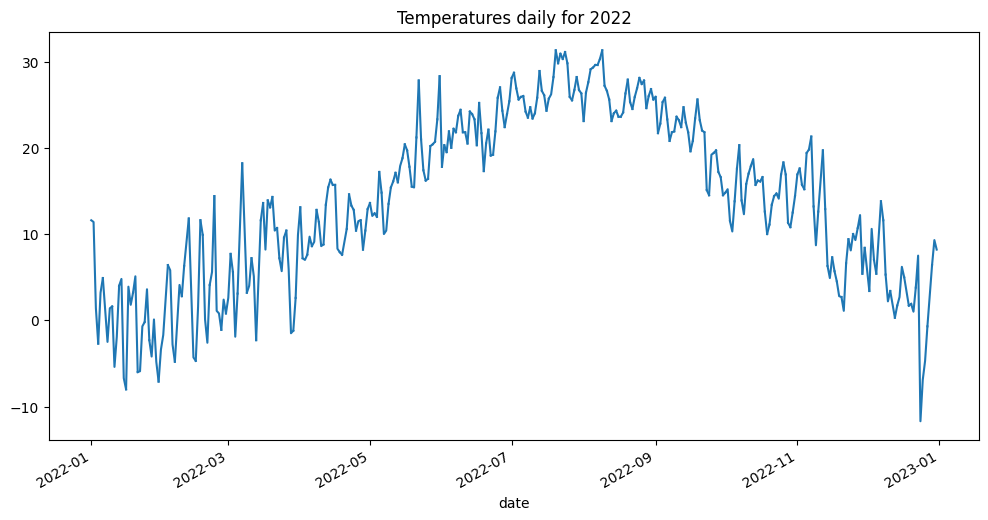

In [29]:
# Set the value of agg.path.chunksize to a number greater than 100
plt.rcParams['agg.path.chunksize'] = 100000

# adjusting the path simplification threshold
plt.rcParams['path.simplify_threshold'] = 1.0

# Set the figure size to make the plot wider
plt.figure(figsize=(12, 6))  
plt.title('Temperatures daily for 2022')

# plotting the data
df_temp['avgTemp'].plot()
plt.show()

## 4. Create a new column "Count of trips" and merge with existing dataframe

In [16]:
df_temp.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp'],
      dtype='object')

In [17]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df_temp.groupby(['date'])['ride_id'].count()).reset_index()

In [18]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)

In [19]:
df_group.columns

Index(['date', 'bike_rides_daily'], dtype='object')

In [20]:
df = df_merged.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

_merge
both          29838806
left_only            0
right_only           0
Name: count, dtype: int64
Shape of January 1st is (20428, 17)
Shape of January 2nd is (43009, 17)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'bike_rides_daily', '_merge'],
      dtype='object')


## 5. Plotting rides per day and temperature

### Initial plot

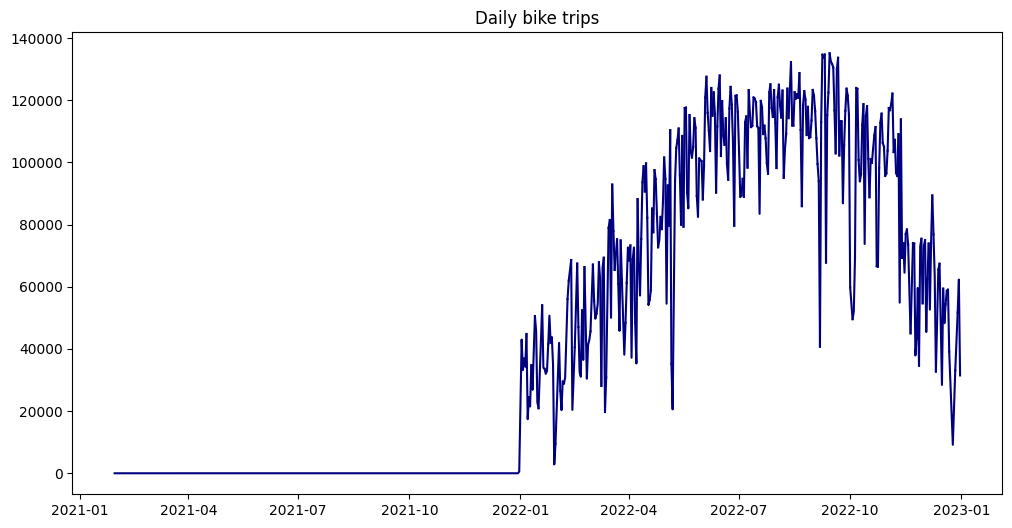

In [21]:
# first try the plot of the bike rides

plt.figure(figsize=(12,6))
plt.title('Daily bike trips')
plt.plot(df_temp['bike_rides_daily'], color = 'navy')
plt.show()

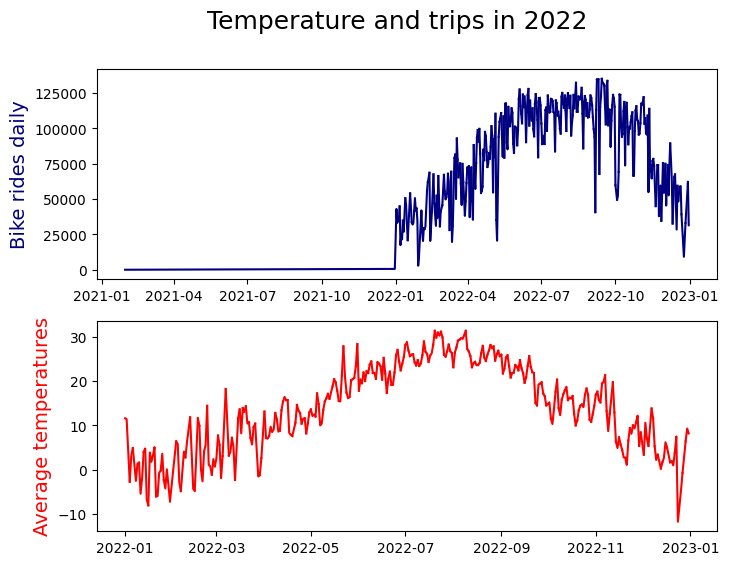

In [22]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(2, figsize =(8, 6))

# Make a plot of the bike rides
ax[0].plot(df_temp['bike_rides_daily'],color = "navy")
ax[0].set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Make a plot with the temperatues on the y-axis using second axis object
ax[1].plot(df_temp["avgTemp"], color = "red")
ax[1].set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.suptitle('Temperature and trips in 2022', fontsize = 18)

plt.show()

In [23]:
# save the plot as a file
fig.savefig(os.path.join(path, '04 Analysis', 'trips_temperatures_dual_line.jpg'),
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

To create the visualization above, I decided to create a plot and subplot to keep the average temperature and number of rides seperate. The first line in the code creates the subplot, the number of plots and the size plots should be. The lines with ax[0] sets the data to be plotted on the y-axis, which is the number of bike rides per month and the legend for the axis. Lines with ax[1] refer to the second plot and define the data points to be plotted as well as the legend for the y-axis. The title for the both subplots was created using the plt.suptitle code.

# Bonus Task

In [24]:
df_temp

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,
2021-01-30,34BD74D84D320CF5,electric_bike,2021-01-30 17:30:45.544,2022-05-23 06:17:27.131,W 144 St & Adam Clayton Powell Blvd,7932.1,Frederick Douglass Blvd & W 112 St,7631.23,40.820877,-73.939249,40.801694,-73.957145,casual,NaN,1,both
2021-02-15,FA436228F4CD7647,classic_bike,2021-02-15 14:11:20.946,2022-08-10 15:01:30.839,Kent Ave & S 11 St,5062.01,Union Ave & Jackson St,5300.06,40.707645,-73.968415,40.716075,-73.952029,casual,NaN,1,both
2021-03-11,8FC77EAE2C0561E4,classic_bike,2021-03-11 22:08:54.461,2022-06-16 09:12:21.565,Union St & 4 Ave,4175.15,Flatbush Ave & Ocean Ave,3704.04,40.677274,-73.982820,40.663657,-73.963014,casual,NaN,1,both
2021-03-14,BF45D1E037463AA8,classic_bike,2021-03-14 18:17:59.923,2022-02-02 23:38:01.993,N 12 St & Bedford Ave,5450.04,S Portland Ave & Hanson Pl,4354.05,40.720798,-73.954847,40.685396,-73.974315,member,NaN,1,both
2021-03-31,763D82F8CFA1D9D1,classic_bike,2021-03-31 15:35:20.070,2022-09-25 14:33:21.607,Willoughby St & Fleet St,4628.05,DeKalb Ave & Franklin Ave,4528.01,40.691966,-73.981302,40.690648,-73.957462,casual,NaN,1,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,F2C4F070A50F9F3B,classic_bike,2022-12-31 13:09:50.131,2022-12-31 13:35:28.984,White St & Moore St,4987.06,Bleecker St & Crosby St,5679.08,40.704508,-73.935100,40.726156,-73.995102,member,8.2,31466,both
2022-12-31,79F3ED73A2BF585C,classic_bike,2022-12-31 17:33:04.512,2022-12-31 17:37:56.886,Division St & Bowery,5270.08,Centre St & Chambers St,5207.01,40.714193,-73.996732,40.712733,-74.004607,member,8.2,31466,both
2022-12-31,DDED85920D307CE1,classic_bike,2022-12-31 09:14:53.652,2022-12-31 09:21:11.859,W 30 St & 10 Ave,6459.07,W 20 St & 8 Ave,6224.05,40.752694,-74.002353,40.743453,-74.000040,member,8.2,31466,both


In [25]:
# Convert started_at and ended_at from object to datetime format
df_temp['start_date'] = pd.to_datetime(df_merged['started_at'])
df_temp['end_date'] = pd.to_datetime(df_merged['ended_at'])

In [27]:
duration = df_temp['start_date'] - df_temp['ended_at']

In [28]:
duration

date
2021-01-30   NaT
2021-02-15   NaT
2021-03-11   NaT
2021-03-14   NaT
2021-03-31   NaT
              ..
2022-12-31   NaT
2022-12-31   NaT
2022-12-31   NaT
2022-12-31   NaT
2022-12-31   NaT
Length: 29838806, dtype: timedelta64[ns]

In [ ]:
mpl.pyplot.hist(x, bins=None, range=None, 
                density=False, weights=None, cumulative=False, bottom=None, 
                histtype='bar', align='mid', orientation='vertical', rwidth=None, 
                log=False, color=None, label=None, stacked=False)